In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter

api = wandb.Api()

In [2]:
runs = api.runs("qba/rehersal Alexnet MNIST Task IL tr-t split")

In [3]:
runs_list = []

for run in runs:
    runs_list.append(run.config)

df = pd.DataFrame(runs_list)

In [4]:
df

,setup,epochs,dataset,architecture,learning_rate,rehearsal_dataset
0,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-random
1,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-random
2,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-random
3,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-random
4,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-highfreq
5,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-highfreq
6,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-highfreq
7,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stylegan-highfreq
8,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stat-wmm
9,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01,stat-wmm


In [5]:
df = runs[0].history(samples=10000)

In [6]:
acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']
acc_test_col = ['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2', 'acc_test_task_3', 'acc_test_task_4']
cols = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4', '_step']

In [76]:
dfs = {}
dfs_test = {}

counter = Counter()

for run in runs:
    curr_dataset = run.config['rehearsal_dataset']
    try:
        curr_run = run.history(samples=10000)
        if curr_dataset in list(dfs.keys()):
            dfs[curr_dataset] += curr_run[acc_test_col].dropna().reset_index().drop(columns='index')
            dfs_test[curr_dataset] += curr_run[acc_col].dropna().reset_index().drop(columns='index')
        else:
            dfs[curr_dataset] = curr_run[acc_test_col].dropna().reset_index().drop(columns='index')
            dfs_test[curr_dataset] = curr_run[acc_col].dropna().reset_index().drop(columns='index')

        counter.update({curr_dataset:1})
    except:
        pass

for k, v in counter.items():
    dfs[k] /= v
    dfs_test[k] /= v

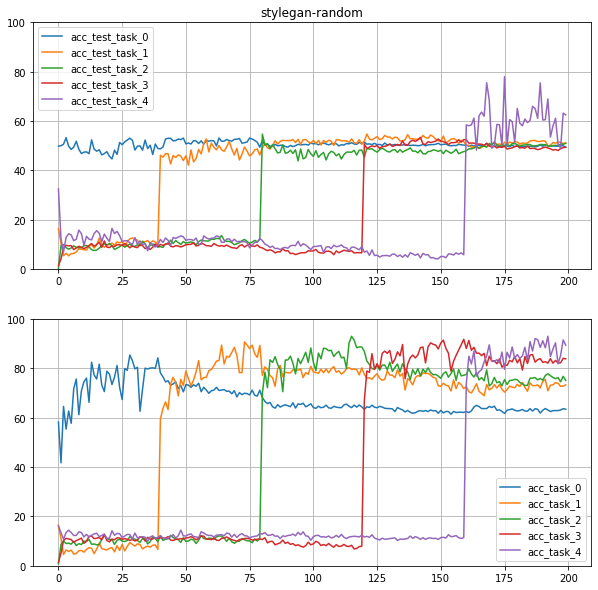

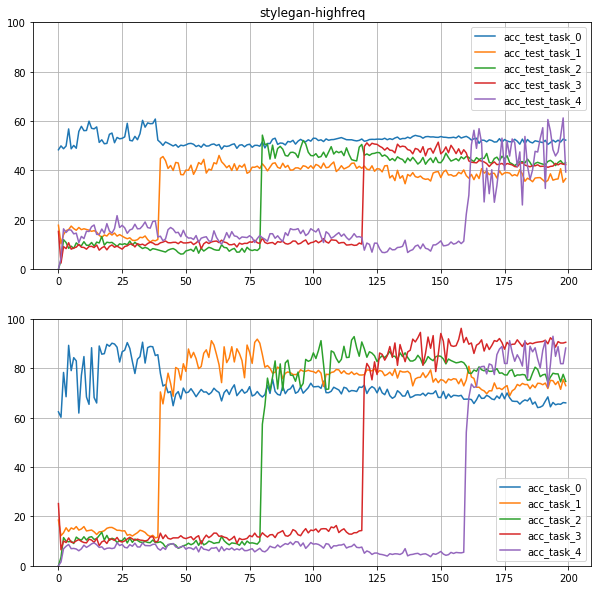

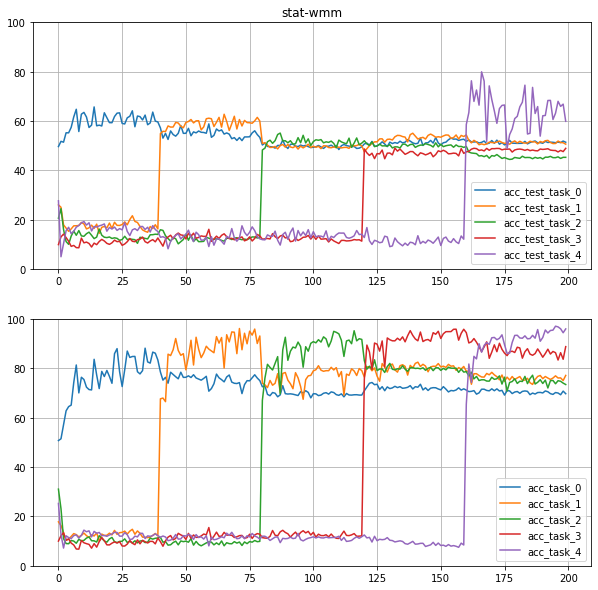

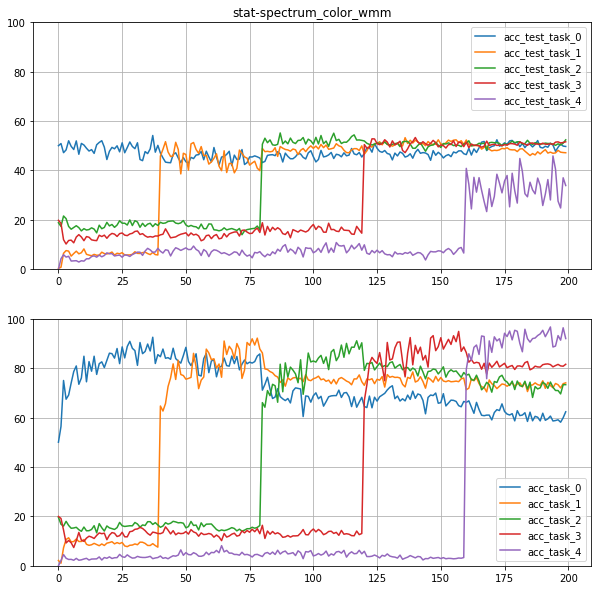

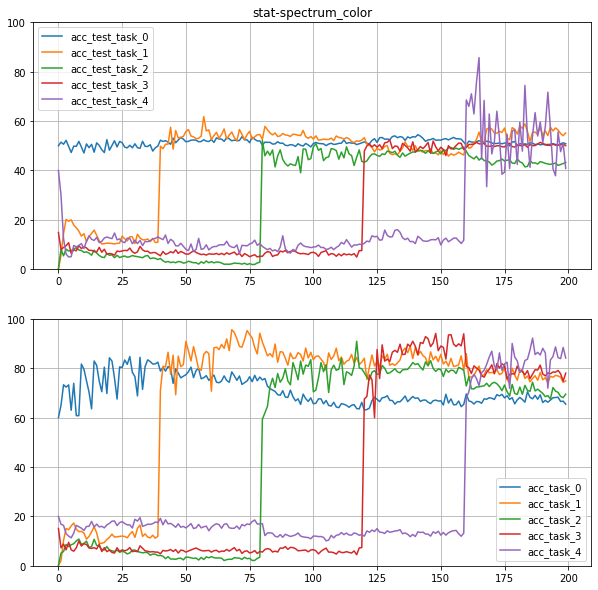

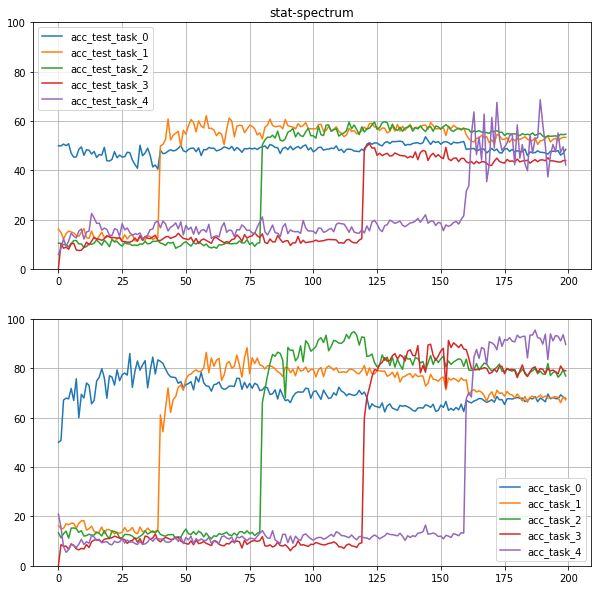

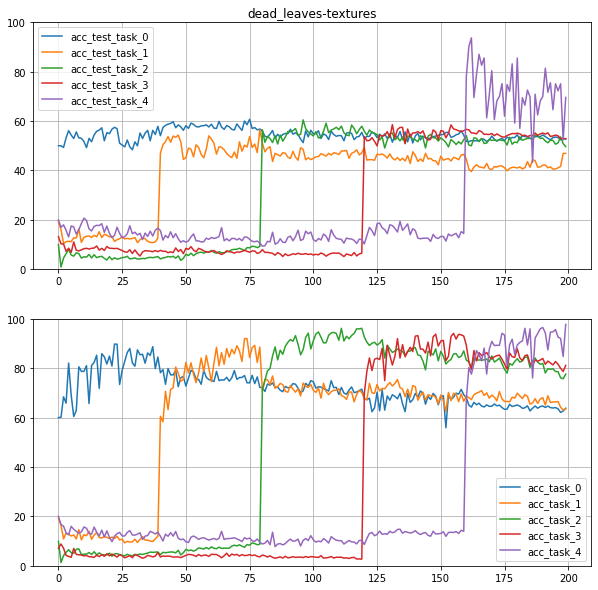

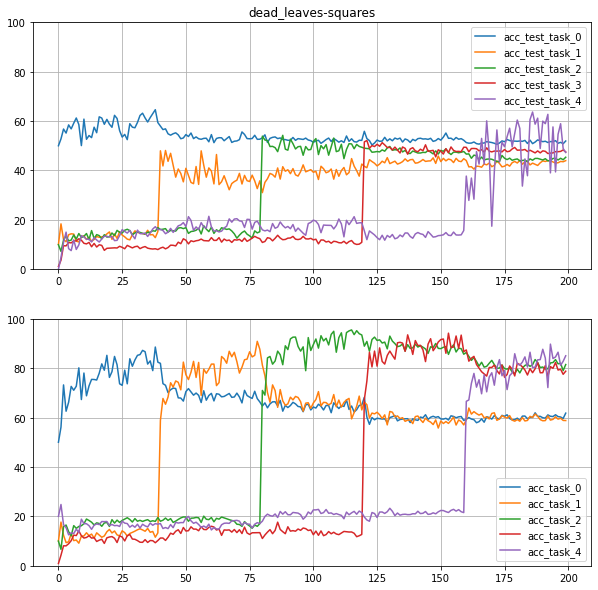

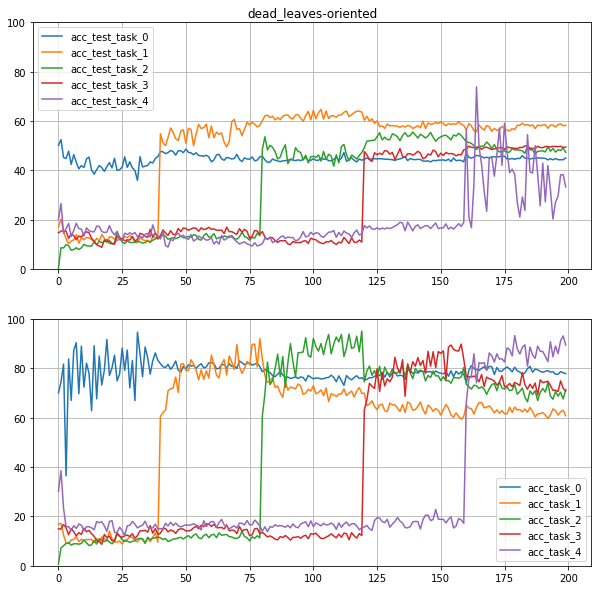

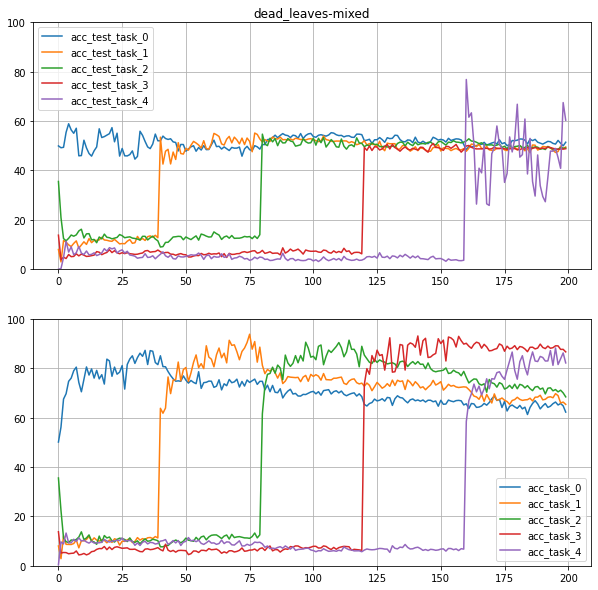

In [86]:
for dataset in list(dfs.keys()):
    fig, ax = plt.subplots(2,1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    dfs[dataset].plot(ax=ax[0], grid=True ,ylim=[0, 100],title=dataset)
    plt.ylim([0,100])
    dfs_test[dataset].plot(ax=ax[1], grid=True ,ylim=[0, 100])
    plt.ylim([0,100])


# MESS

In [13]:
# dfs = {}

# for i in range(len(runs)):
#     print(f"{runs[i].name}")
#     dfs[i] = runs[i].history(samples=10000)
#     print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

In [14]:
dfs = {}

for i in range(len(runs)):
    print(f"{runs[i].name}")
    if runs[i].name in noise_rehersal_runs:
        dfs[i] = runs[i].history(samples=10000)
        print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

fresh-fire-54


NameError: name 'noise_rehersal_runs' is not defined

In [ ]:
df = dfs[1]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

In [ ]:
df_all_runs = pd.DataFrame()

for i in dfs.keys():
    df_all_runs = pd.concat([df_all_runs, dfs[i][acc_col].dropna()])

df_all_runs.reset_index().groupby("index").mean().plot()

# REHERSAL

In [ ]:
runs = api.runs("qba/rehersal small net MNIST Task IL")

In [ ]:
noise_rehersal_runs = [
'vibrant-sunset-34',
'eager-smoke-33',
'magic-glade-32'
]

acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']
cols = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4', '_step']

In [ ]:
dfs_rehersal = {}

for i in range(len(runs)):
    print(f"{runs[i].name}")
    if runs[i].name in noise_rehersal_runs:
        dfs_rehersal[i] = runs[i].history(samples=10000)
        print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

# Single run

In [ ]:
df = dfs_rehersal[1]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

# All runs mean

In [ ]:
df_all_runs_rehersal = pd.DataFrame()

for i in dfs_rehersal.keys():
    df_all_runs_rehersal = pd.concat([df_all_runs_rehersal, dfs_rehersal[i][acc_col].dropna()])

df_all_runs_rehersal.reset_index().groupby("index").mean().plot()

# Comparison

In [ ]:
plt.figure(figsize=(20,10))
legend = []

for task_num in range(5):
    plt.plot(df_all_runs.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.plot(df_all_runs_rehersal.reset_index().groupby("index").mean()[acc_col[task_num]])
    legend.extend(([f"no rehersal task {task_num}", f"rehersal task {task_num}"]))
    plt.title(f"task {task_num}")
plt.legend(legend)
plt.show()

In [ ]:
for task_num in range(5):
    plt.figure(figsize=(20,10))
    plt.plot(df_all_runs.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.plot(df_all_runs_rehersal.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.legend([f"no rehersal task {task_num}", f"rehersal task {task_num}"])
    plt.title(f"task {task_num}")
    plt.show()